# Cottrell Visualization Demo - matplotlib

This demo shows some visualization examples for the python libraries [matplotlib](https://matplotlib.org/) and [plotly](https://plotly.com) using Hydrogen atom orbitals as example data. For each library, 1D line plots, 2D contour plots, and 3D surface plots are considered.

In [1]:
import numpy as np
import itertools

import matplotlib.pyplot as plt

from wavefunctions import spherical_to_cartesian, cartesian_to_spherical, wavefunction

# Making Plots with matplotlib

matplotlib is one of the oldest and most popular python plotting libraries (started 2003). Can be used with an interface that uses figure objects, or with a "procedural" interface which is made to mimic Matlab's plotting interface.

In [2]:
# Generate sample data for line plot section

r = np.linspace(0, 15, 30)

s_wavefunctions = []
for i in range(1, 4):
    s_wavefunctions.append(wavefunction(i, 0, 0)(r))

<IPython.core.display.Javascript object>


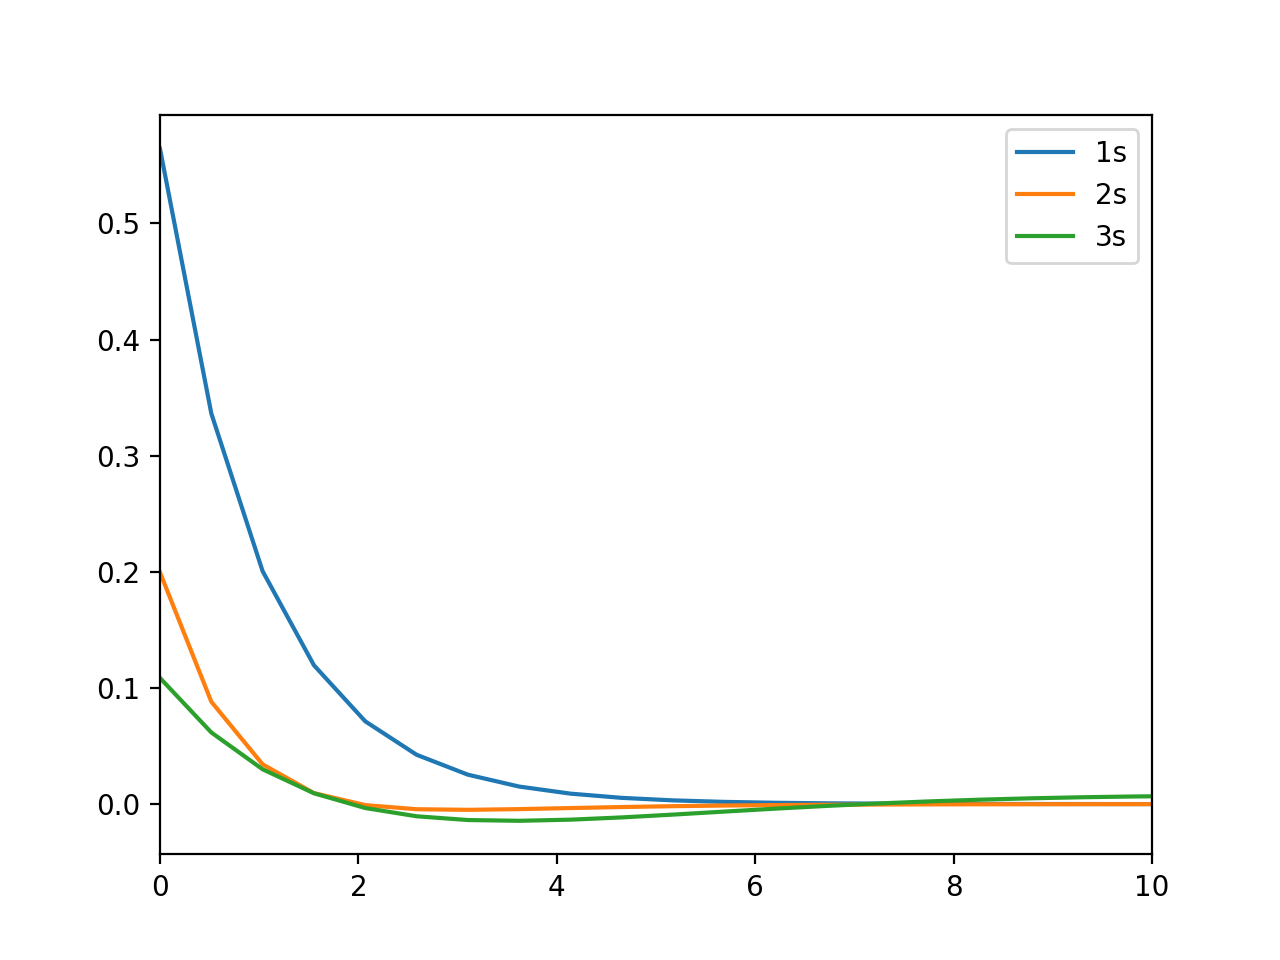

In [3]:
# Demonstration of line plots with matplotlib

# You can make a matplotlib graph more interactive by using %matplotlib notebook. This also adds a label over
# the figure (Figure 1, Figure 2, etc.)
%matplotlib notebook

# Procedural interface - each command adds to the active figure.
plt.figure() # Creates a new figure.
plt.plot(r, s_wavefunctions[0], label='1s')
plt.plot(r, s_wavefunctions[1], label='2s')
plt.plot(r, s_wavefunctions[2], label='3s')
plt.xlim(0, 10)
plt.legend()

<IPython.core.display.Javascript object>


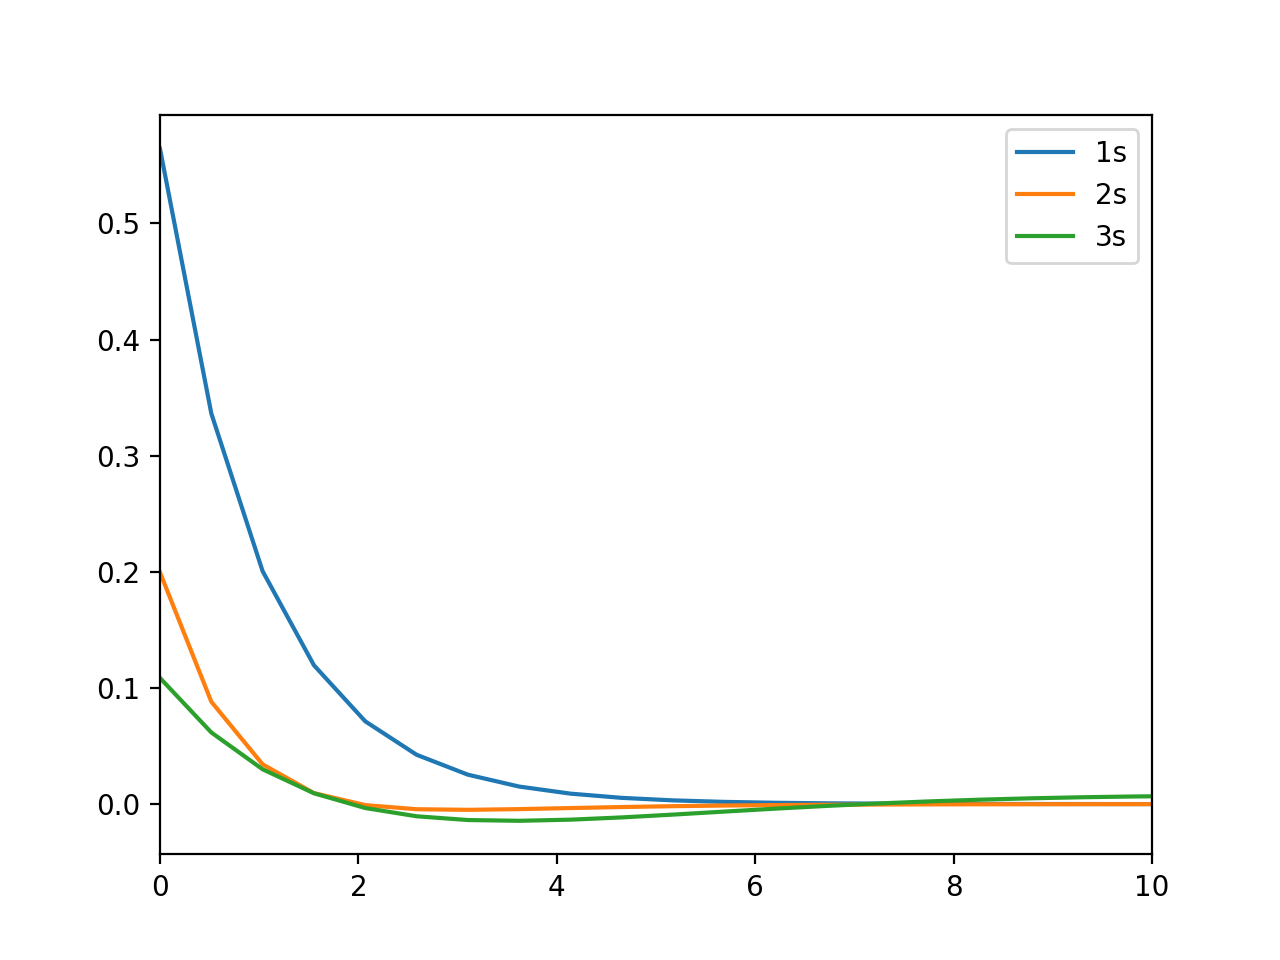

In [4]:
# We can make the same plot using figure objects

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(r, s_wavefunctions[0], label='1s')
ax.plot(r, s_wavefunctions[1], label='2s')
ax.plot(r, s_wavefunctions[2], label='3s')
ax.set_xlim(0, 10)
ax.legend()

<IPython.core.display.Javascript object>


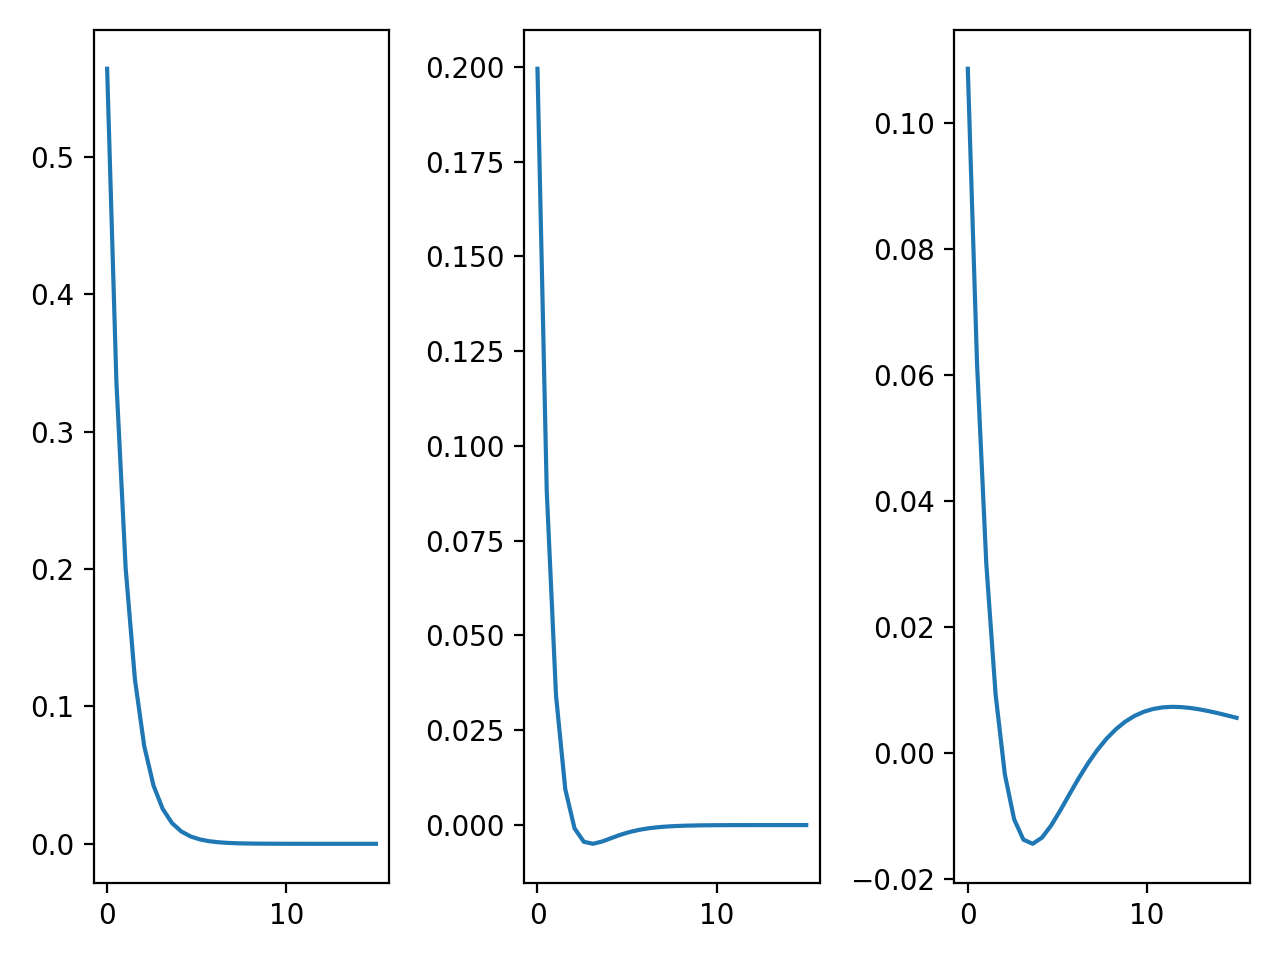

In [5]:
# These seem pretty similar, but the figure object interface comes in handy when working with subplots.

# We can use the figure object interface to create a plot with multiple subplots. 
fig, ax = plt.subplots(1,3) # First argument is the number of rows, seconds is number of columns.

# ax is a list of the axes, you can add data to them the same way you did above
ax[0].plot(r, s_wavefunctions[0], label='1s')
ax[1].plot(r, s_wavefunctions[1], label='2s')
ax[2].plot(r, s_wavefunctions[2], label='3s')

# Use tight_layout to avoid overlapping labels
plt.tight_layout()

## Contour Plots

In [6]:
# Make grid on xy plane for contour plot
side = np.linspace(-20, 20, 41)
num_points_side = len(side)
combinations = np.array(list(itertools.product(side, side, [0])))
x, y, z = combinations[:,0], combinations[:,1], combinations[:,2]
r, theta, phi = cartesian_to_spherical(x, y, z)

In [7]:
# Get px, py, pz on xy plane
p_wavefunctions_xy = []
for i in range(-1, 2):
    p_wavefunction = wavefunction(2, 1, i)(r, theta, phi).reshape(num_points_side, num_points_side)
    p_wavefunctions_xy.append(p_wavefunction)

## 2p orbitals

<IPython.core.display.Javascript object>


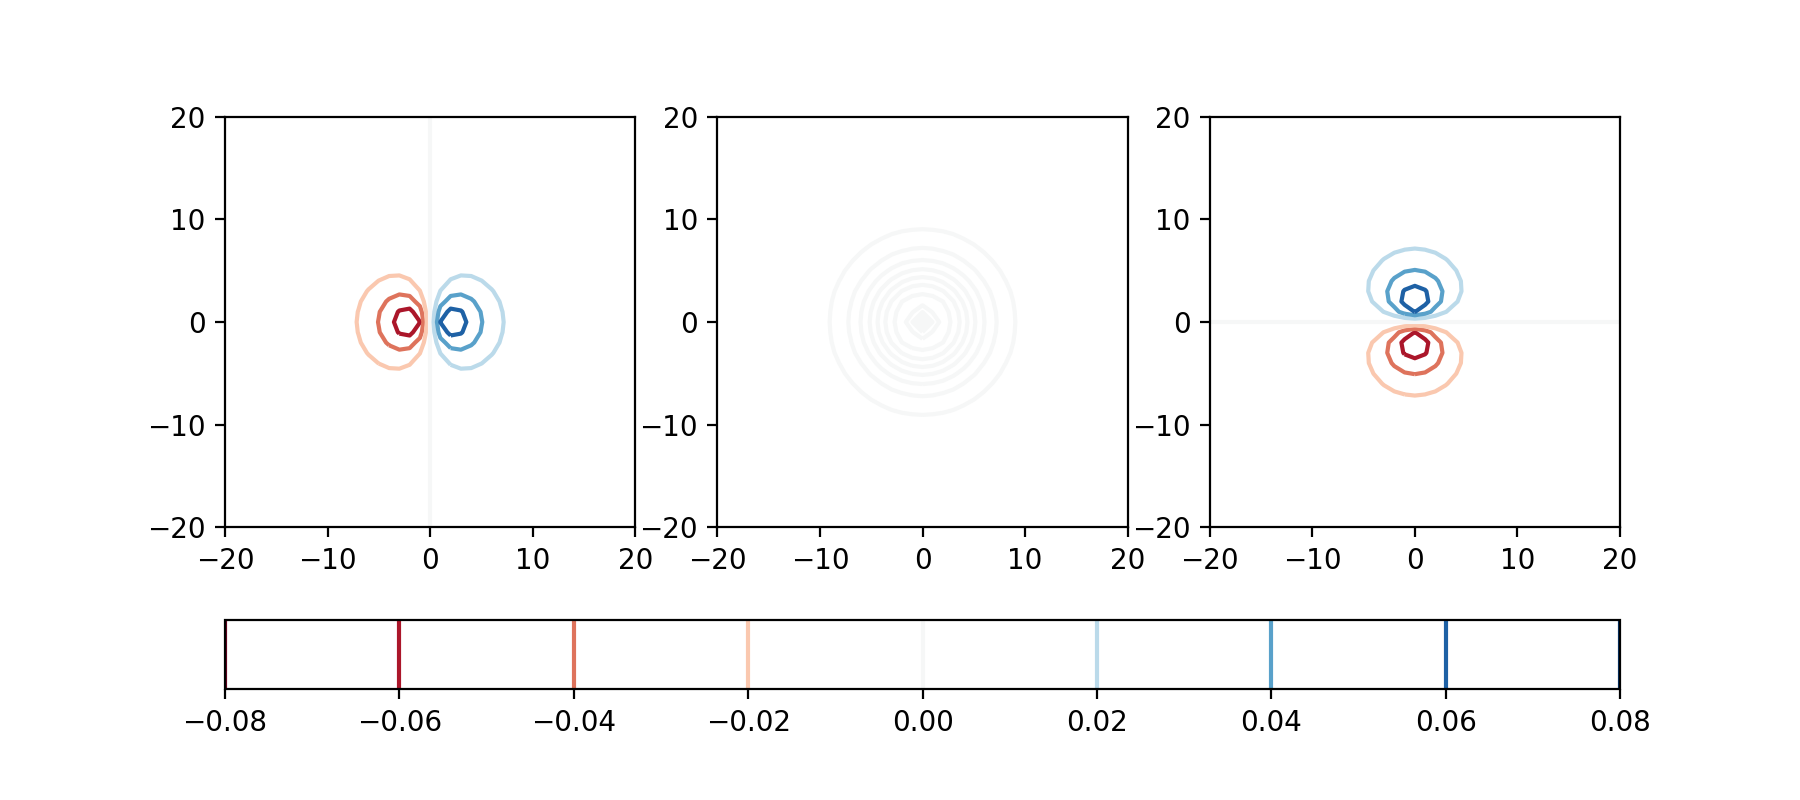

In [8]:
contour_min = -p_wavefunctions_xy[0].max()
contour_max= p_wavefunctions_xy[0].max()

# Create subplots 
fig, ax = plt.subplots(1,3, figsize=(9,4)) # Add figsize argument here to set figure side

# ax is a list of the axes, you can add data to them the same way you did above.
# we add a color map specification here (Red to Blue), and minimum and maximum color map values.
for i in range(3):
    CS = ax[i].contour(side, side, p_wavefunctions_xy[i], cmap='RdBu', vmin=contour_min, vmax=contour_max)
    ax[i].set_aspect('equal')


fig.colorbar(CS, ax=ax[:], location='bottom')

<IPython.core.display.Javascript object>


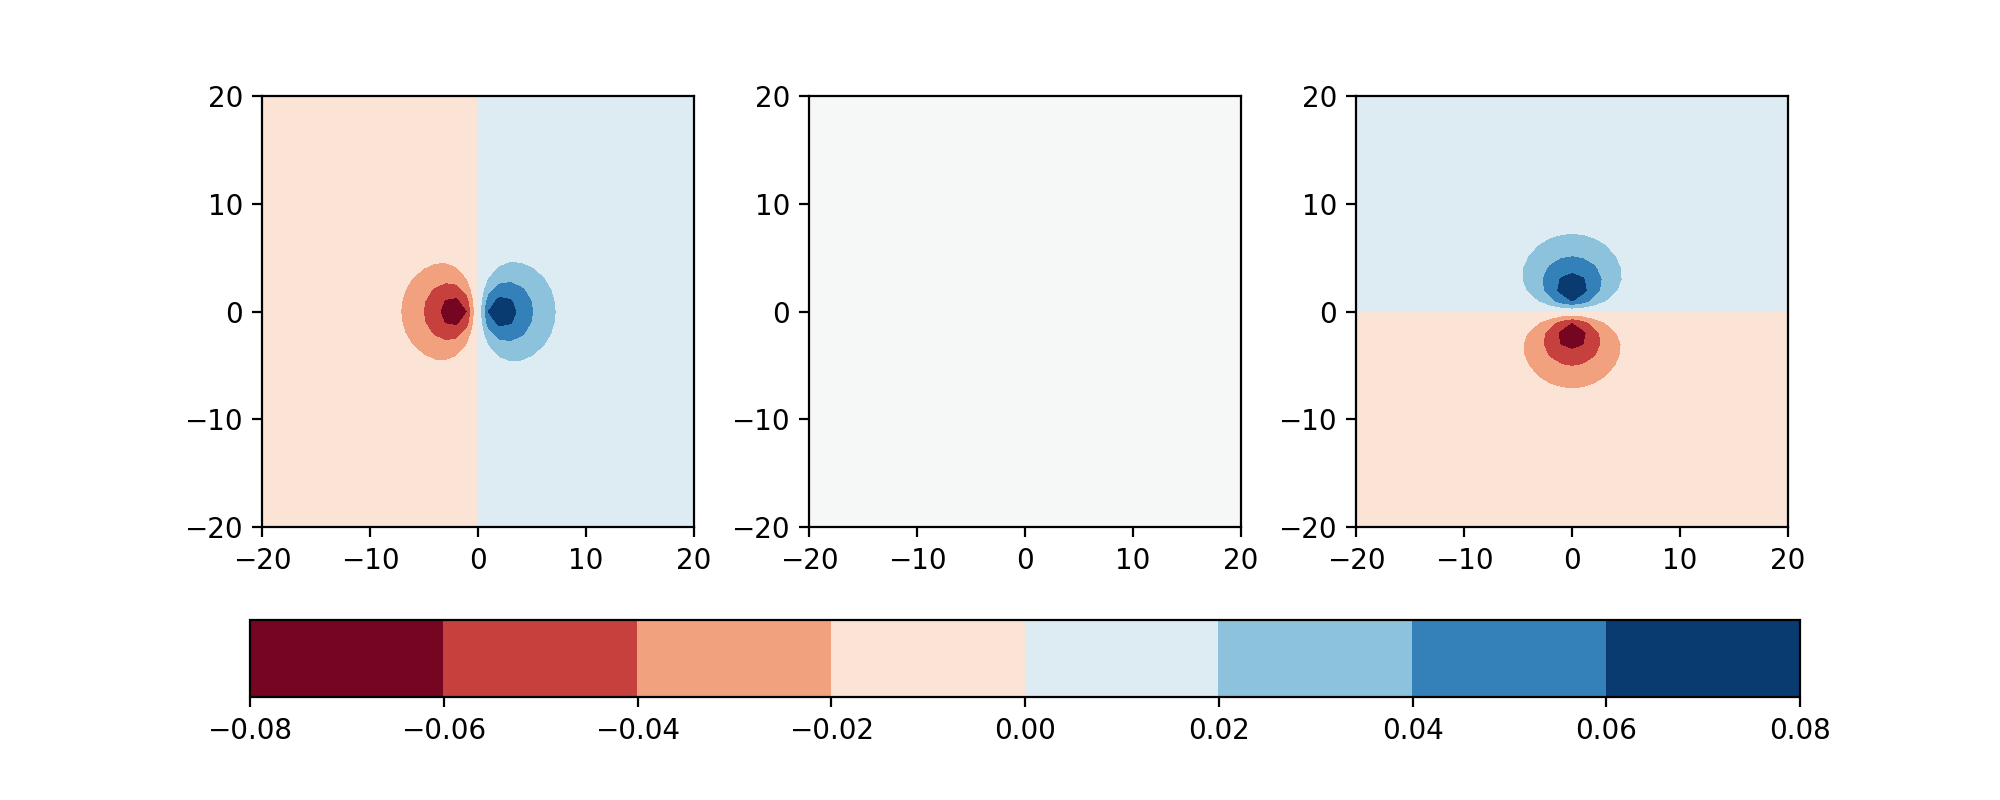

In [9]:
# We can also make the orbitals filled

contour_min = -p_wavefunctions_xy[0].max()
contour_max= p_wavefunctions_xy[0].max()

# Create subplots 
fig, ax = plt.subplots(1,3, figsize=(10,4)) # Add figsize argument here to set figure side

# ax is a list of the axes, you can add data to them the same way you did above.
# we add a color map specification here (Red to Blue), and minimum and maximum color map values.
for i in range(3):
    CS = ax[i].contourf(side, side, p_wavefunctions_xy[i], cmap='RdBu', vmin=contour_min, vmax=contour_max)
    ax[i].set_aspect('equal')

fig.colorbar(CS, ax=ax[:], location='bottom')

# 3p orbitals

<IPython.core.display.Javascript object>


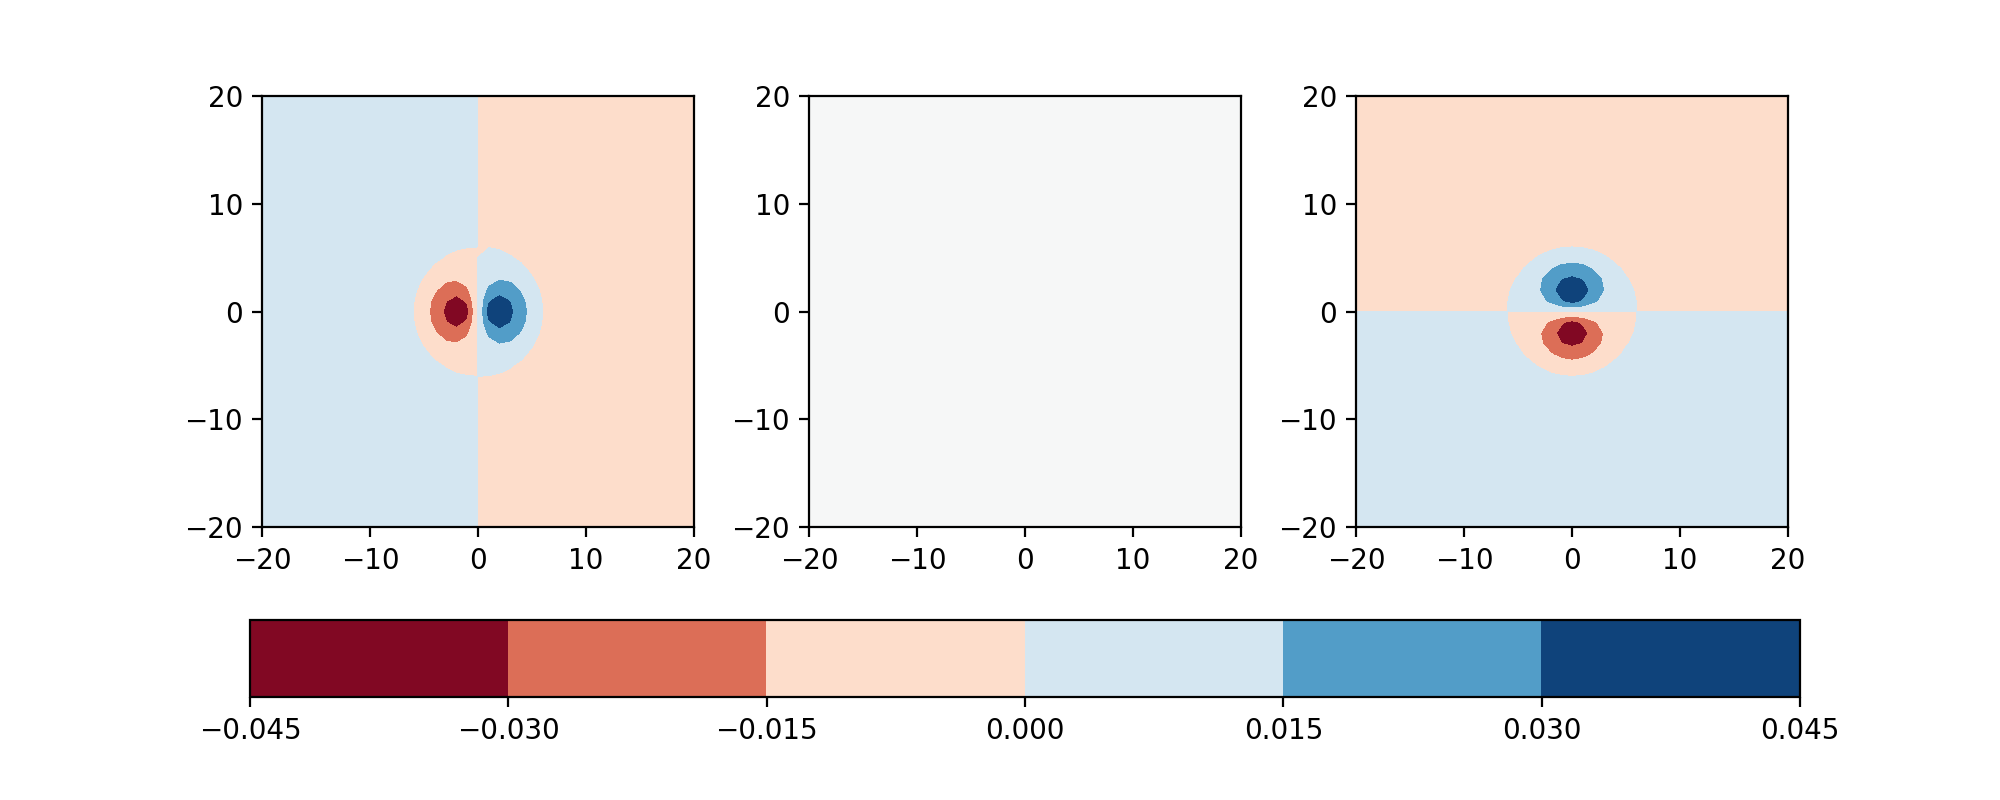

In [10]:
# Get px, py, pz on xy plane
p_wavefunctions_xy = []
for i in range(-1, 2):
    p_wavefunction = wavefunction(3, 1, i)(r, theta, phi).reshape(num_points_side, num_points_side)
    p_wavefunctions_xy.append(p_wavefunction)
    
contour_min = -p_wavefunctions_xy[0].max()
contour_max= p_wavefunctions_xy[0].max()

# Create subplots 
fig, ax = plt.subplots(1,3, figsize=(10,4)) # Add figsize argument here to set figure side

# ax is a list of the axes, you can add data to them the same way you did above.
# we add a color map specification here (Red to Blue), and minimum and maximum color map values.
for i in range(3):
    CS = ax[i].contourf(side, side, p_wavefunctions_xy[i], cmap='RdBu', vmin=contour_min, vmax=contour_max)
    ax[i].set_aspect('equal')

fig.colorbar(CS, ax=ax[:], location='bottom')

This isn't quite what we expect. Looking at the figure, we see that this may be because our contour plot doesn't have enough levels. We can use linspace to create an evenly spaced list of levels, then add the `levels` argument to the `contourf` function.

<IPython.core.display.Javascript object>


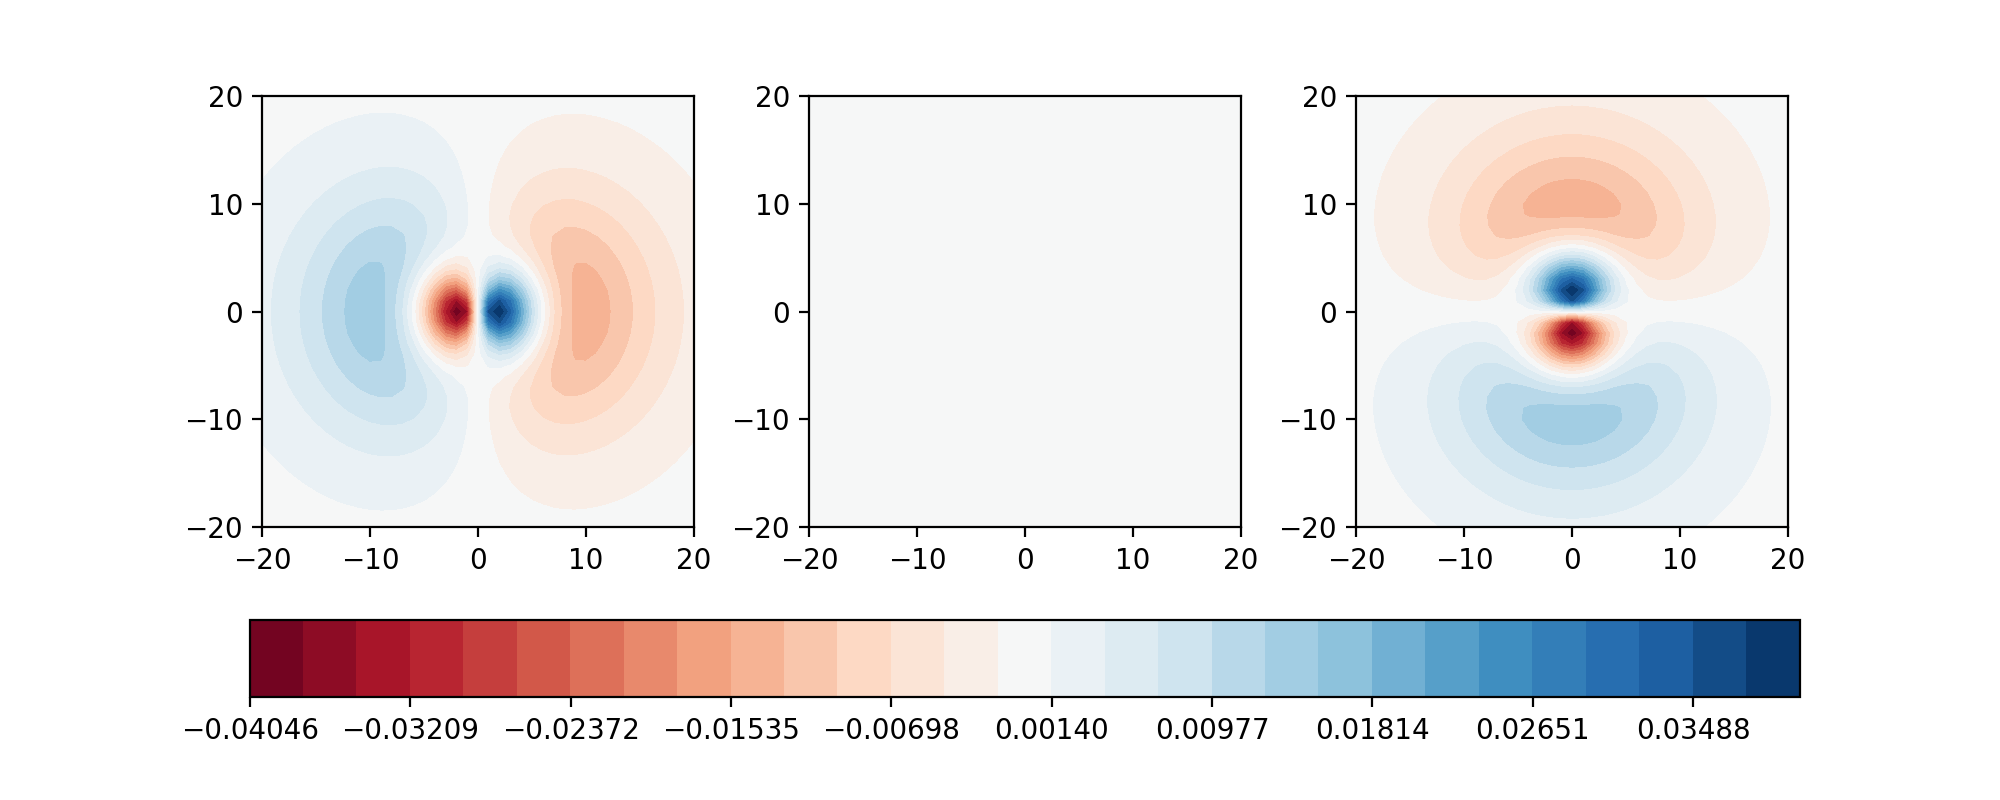

In [11]:
contour_min = -p_wavefunctions_xy[0].max()
contour_max= p_wavefunctions_xy[0].max()
levels = np.linspace(contour_min, contour_max, 30)

# Get px, py, pz on xy plane
p_wavefunctions_xy = []
for i in range(-1, 2):
    p_wavefunction = wavefunction(3, 1, i)(r, theta, phi).reshape(num_points_side, num_points_side)
    p_wavefunctions_xy.append(p_wavefunction)

#contour_min = -p_wavefunctions_xy[0].max()
#contour_max= p_wavefunctions_xy[0].max()

# Create subplots 
fig, ax = plt.subplots(1,3, figsize=(10,4)) # Add figsize argument here to set figure side

# ax is a list of the axes, you can add data to them the same way you did above.
# we add a color map specification here (Red to Blue), and minimum and maximum color map values.
for i in range(3):
    CS = ax[i].contourf(side, side, p_wavefunctions_xy[i], cmap='RdBu', vmin=contour_min, vmax=contour_max, levels=levels)
    ax[i].set_aspect('equal')

fig.colorbar(CS, ax=ax[:], location='bottom')

# Surface Plots

In [14]:
# Make grid in 3D space
side = np.linspace(-20, 20, 41)
num_points_side = len(side)
combinations = np.array(list(itertools.product(side, side, side)))
x, y, z = combinations[:,0], combinations[:,1], combinations[:,2]
r, theta, phi = cartesian_to_spherical(x, y, z)

# 3p wavefunction
p3 = wavefunction(3, 1, 0)(r, theta, phi)



Matplotlib does not have an isosurface plot, so one option might be to make a 3D scatter plot. One downside of a 3D scatter plot in matplotlib is that you cannot set the axis ratios as with the contour plots (`axis equal`)

<IPython.core.display.Javascript object>


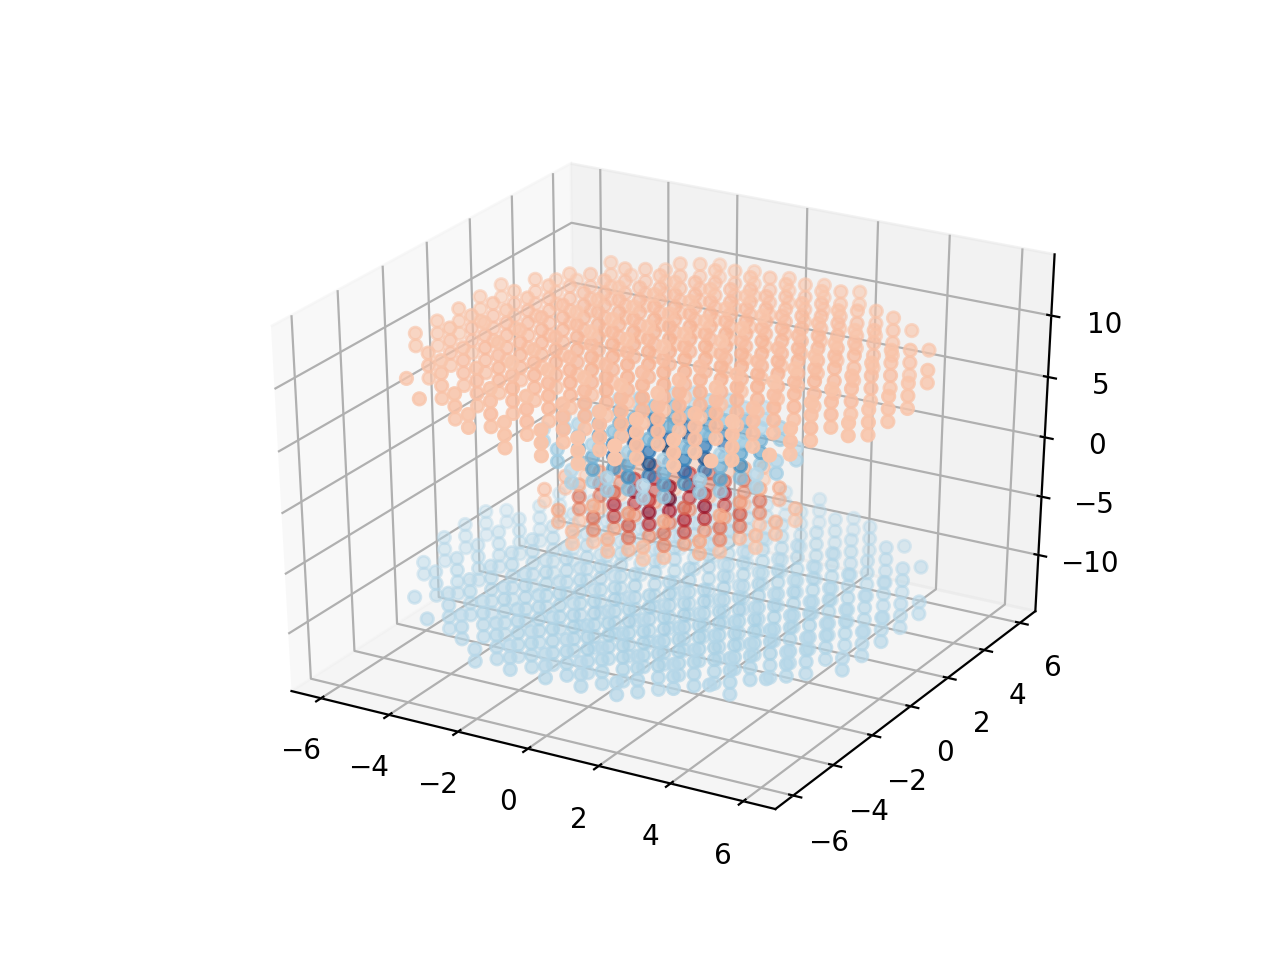

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Filter data 
mask_low = p3 < np.percentile(p3, 1)
mask_high = p3 > np.percentile(p3, 99) 
x_filtered = x[mask_low | mask_high]
y_filtered = y[mask_low | mask_high]
z_filtered = z[mask_low | mask_high]
p3_filtered = p2[mask_low | mask_high]

ax.scatter(x_filtered, y_filtered, z_filtered, c=p3_filtered, cmap='RdBu', )